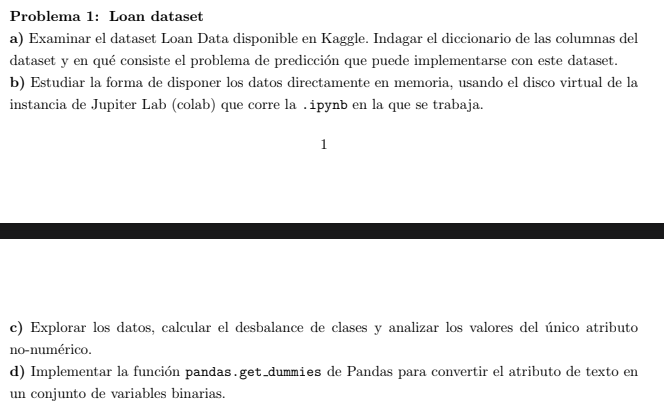

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

from scipy.stats import multivariate_normal

import kagglehub

import pandas as pd

In [ ]:

# Download latest version
path = kagglehub.dataset_download("itssuru/loan-data")

print("Path to dataset files:", path)

100%|██████████| 213k/213k [00:00<00:00, 596kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/itssuru/loan-data/versions/1


In [ ]:
path

'/root/.cache/kagglehub/datasets/itssuru/loan-data/versions/1'

In [ ]:
data = pd.read_csv(path+"/loan_data.csv")

In [ ]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
data.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [ ]:
data.count()

,0
credit.policy,9578
purpose,9578
int.rate,9578
installment,9578
log.annual.inc,9578
dti,9578
fico,9578
days.with.cr.line,9578
revol.bal,9578
revol.util,9578


In [ ]:
print(data.isnull().sum())

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64


In [ ]:
data = pd.get_dummies(data)
data = data.map(lambda j: int(j) if isinstance(j, bool) else j)
data

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,0,1,0,0


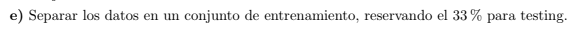

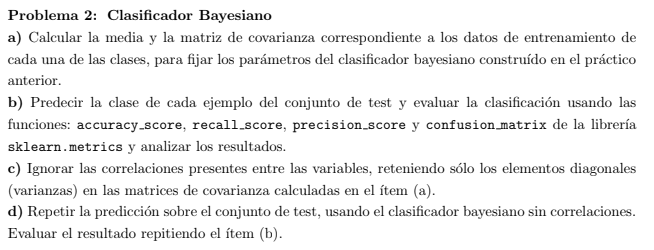

In [ ]:
import numpy as np

from sklearn.model_selection import train_test_split

#Voy a usar la columna 'not.fully.paid' como etiqueta de entrenamiento. Es 1 si no la pago, 0 si. Ya que queremos predecir si va a devolver la plata

x = data.drop(['not.fully.paid'], axis=1)

y = data['not.fully.paid']

#Es importante el stratify, para que la cantidad de clases sea estable en los conjuntos de entrenamiento y evaluacion y asi tengan mas sentido las probabilidadas estimadas.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, stratify=y)

#separo los datos de entrenamiento por clase

x_train0 = x_train[y_train == 0] #Caracteristicas de la clase 0
x_train1 = x_train[y_train == 1] #Caracteristicas de la clase 1


#Calculo la matriz de covarianza y media para cada clase a predecir
cov0 = x_train0.cov()
mean0 = x_train0.mean(axis=0)

cov1 = x_train1.cov()
mean1 = x_train1.mean(axis=0)

#Tambien voy a necesitar estimar p(devuelva) y p(no devuelva)
p_w0 = len(x_train0) / len(y_train)
p_w1 = len(x_train1) / len(y_train)

print(f"Probabilidad estimada de que no devuelva la plata: {p_w0}")
print(f"Probabilidad estimada de que si devuelva la plata: {p_w1}\n")

# Calcular verosimilitudes
rv0 = multivariate_normal(mean=mean0, cov=cov0, allow_singular=True)
rv1 = multivariate_normal(mean=mean1, cov=cov1, allow_singular=True )

likelihood_w0 = rv0.pdf(x_test) #Acá calculo para cada punto del conjunto de test su probabilidad segun los parametros estimados de la primera clase
likelihood_w1 = rv1.pdf(x_test) #Acá calculo para cada punto del conjunto de test su probabilidad segun los parametros estimados de la segunda clase

# Clasificar: mayor verosimilitud
y_pred = (likelihood_w1*p_w1 > likelihood_w0*p_w0).astype(int)

from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay

print(f"accuracy: {accuracy_score(y_test, y_pred)}")
print(f"recall: {recall_score(y_test, y_pred)}")
print(f"precision: {precision_score(y_test, y_pred)}")
confusion_matrix(y_test, y_pred)


Probabilidad estimada de que no devuelva la plata: 0.83995636590307
Probabilidad estimada de que si devuelva la plata: 0.16004363409693004

accuracy: 0.6681429927238216
recall: 0.4308300395256917
precision: 0.2226762002042901


array([[1894,  761],
       [ 288,  218]])

Predijo muy bien la no devolucion del dinero, pero un poco mal la de si devolverlo. Tambien puede que se deba a que hay muchos mas ejemplo de no devolucion, en particular cerca del 80%.

Notar que la matriz de confusion es de la forma


[[TN, FP],[FN, TP]] = [[0 bien, 1 pero era 0],[0 pera era 1, 1 bien]]

La accuracy, que nos dice que tan bien predice el valor de salida en general, es del 70% aprox. puede ser engañosa porque las clases están desbalanceadas.


El recall mide la cantidad de veces que le pegamos a la clase positiva de entre todos los ejemplos verdaderamente positivos, nos da aprox un 50% de las veces.


La precision nos dice que tan seguido le pegamos a la clase positiva de entre todas las veces que clasificamos como positiva, aprox 20%

Supongo que un problema es que hay muchos mas ejemplos de clases negativas que positivas, y esta sesgado para ese lado.

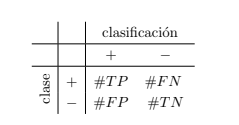

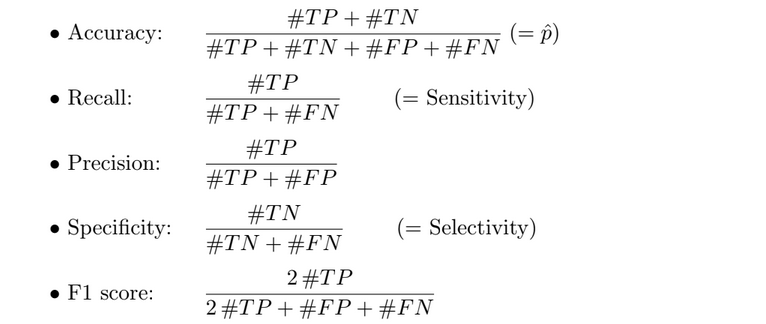

In [ ]:
#c)

#Elimino los elementos que no esten en la diagonal de la covarianza, asi asumo las caracteristicas no tienen relacion

cov0_no_rel = np.diag(np.diag(cov0))
cov1_no_rel = np.diag(np.diag(cov1))

# Calcular verosimilitudes
rv0 = multivariate_normal(mean=mean0, cov=cov0_no_rel, allow_singular=True)
rv1 = multivariate_normal(mean=mean1, cov=cov1_no_rel, allow_singular=True )

likelihood_w0 = rv0.pdf(x_test) #Acá calculo para cada punto del conjunto de test su probabilidad segun los parametros estimados de la primera clase
likelihood_w1 = rv1.pdf(x_test) #Acá calculo para cada punto del conjunto de test su probabilidad segun los parametros estimados de la segunda clase

# Clasificar: mayor verosimilitud
y_pred = (likelihood_w1*p_w1 > likelihood_w0*p_w0).astype(int)

print(f"accuracy: {accuracy_score(y_test, y_pred)}")
print(f"recall: {recall_score(y_test, y_pred)}")
print(f"precision: {precision_score(y_test, y_pred)}")
confusion_matrix(y_test, y_pred)



accuracy: 0.6472635242012021
recall: 0.4782608695652174
precision: 0.22140896614821592


array([[1804,  851],
       [ 264,  242]])

Los resultados son muy similares a los obtenidos antes, lo que me hace pensar que las caracteristicas pueden no estar relacionadas entre si. PREGUNTAR.

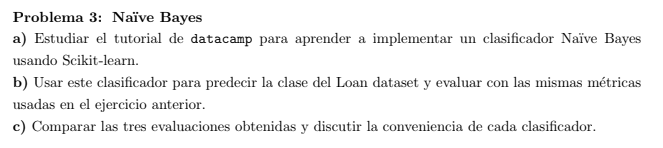

In [ ]:
#3

from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print(f"accuracy: {accuracy_score(y_test, y_pred)}")
print(f"recall: {recall_score(y_test, y_pred)}")
print(f"precision: {precision_score(y_test, y_pred)}")
confusion_matrix(y_test, y_pred)



accuracy: 0.8253717178108194
recall: 0.08695652173913043
precision: 0.3283582089552239


array([[2565,   90],
       [ 462,   44]])

Dio mucho mejor resultado que los otros clasificadores, me pregunto porqué.